# Preprocessing
We want to generate transformed images before training  

**No Augmentation**
- [x] Resize
- [x] ToTensor

**Basic Set**
- [x] B - Saturation, Contrast, Brightness
- [x] C - Saturation, Contrast, Brightness, and Hue
- [x] D - Affine
- [ ] E - Flips
- [ ] F - Random Crops
- [ ] G - Random Erasing
- [ ] H - Elastic deformation
- [ ] I - Lesion Mix (mix of 2 images)  

**Advance set**
- [ ] J - Basic Set F → D → E → C.
- [ ] K - Basic Set + Erasing F → G → D → E → C.
- [ ] L - Basic Set + Elastic F → D → H → E → C.
- [ ] M - Basic Set + Mix I → F → D → E → C.




In [1]:
# check if this notebook called from main one
try: IS_MAIN
except: IS_MAIN = False

In [2]:
from os.path import join

# setup necessary parameters
if IS_MAIN:
    print('Preprocessing mode: MAIN')
    
else:
    print('Preprocessing mode: STANDALONE')
    
    # Transformation config
    t_config = {'seg':{
        'train_size':500,
        'val_size':200,
        'test_size':100
                    },
              'clf':{
        'train_size':{'nev':250,'mel':250},
        'val_size':{'nev':100,'mel':100},
        'test_size':{'nev':50,'mel':50}
                    },
              'img_size':(64,64)
             }
    
    # define input folders
    base_dir = 'data/raw'
    seg_dir = join(base_dir, 'segmentation')
    clf_dir = join(base_dir, 'classification')

    # Segmentation
    seg_validation_dir = join(seg_dir, 'validation')
    seg_train_dir = join(seg_dir, 'train')
    seg_test_dir = join(seg_dir, 'test')

    seg_validation_img_dir = join(seg_validation_dir, 'images')
    seg_validation_msk_dir = join(seg_validation_dir, 'masks')
    seg_train_img_dir = join(seg_train_dir, 'images')
    seg_train_msk_dir = join(seg_train_dir, 'masks')
    seg_test_img_dir = join(seg_test_dir, 'images')
    seg_test_msk_dir = join(seg_test_dir, 'masks')

    # Classification
    clf_validation_dir = join(clf_dir, 'validation')
    clf_train_dir = join(clf_dir, 'train')
    clf_test_dir = join(clf_dir, 'test')

    clf_validation_nev_dir = join(clf_validation_dir, 'nevus')
    clf_validation_mel_dir = join(clf_validation_dir, 'melanoma')
    clf_train_nev_dir = join(clf_train_dir, 'nevus')
    clf_train_mel_dir = join(clf_train_dir, 'melanoma')
    clf_test_nev_dir = join(clf_test_dir, 'nevus')
    clf_test_mel_dir = join(clf_test_dir, 'melanoma')
    

Preprocessing mode: STANDALONE


# Folders for transfored files 

In [3]:
def define_transform_dirs():
    t = {}
    t['base'] = 'data/transforms'
    t['seg'] = {}
    t['clf'] = {}
    t['seg']['base'] = join(t['base'], 'segmentation')
    t['clf']['base'] = join(t['base'], 'classification')

    t['seg']['val'] = {}
    t['seg']['train'] = {}
    t['seg']['test'] = {}
    t['seg']['val']['base'] = join(t['seg']['base'], 'validation')
    t['seg']['train']['base'] = join(t['seg']['base'], 'train')
    t['seg']['test']['base'] = join(t['seg']['base'], 'test')

    t['seg']['val']['img'] = join(t['seg']['val']['base'], 'images')
    t['seg']['val']['msk'] = join(t['seg']['val']['base'], 'masks')
    t['seg']['train']['img'] = join(t['seg']['train']['base'], 'images')
    t['seg']['train']['msk'] = join(t['seg']['train']['base'], 'masks')
    t['seg']['test']['img'] = join(t['seg']['test']['base'], 'images')
    t['seg']['test']['msk'] = join(t['seg']['test']['base'], 'masks')

    t['clf']['val'] = {}
    t['clf']['train'] = {}
    t['clf']['test'] = {}
    t['clf']['val']['base'] = join(t['clf']['base'], 'validation')
    t['clf']['train']['base'] = join(t['clf']['base'], 'train')
    t['clf']['test']['base'] = join(t['clf']['base'], 'test')

    t['clf']['val']['nev'] = join(t['clf']['val']['base'], 'nevus')
    t['clf']['val']['mel'] = join(t['clf']['val']['base'], 'melanoma')
    t['clf']['train']['nev'] = join(t['clf']['train']['base'], 'nevus')
    t['clf']['train']['mel'] = join(t['clf']['train']['base'], 'melanoma')
    t['clf']['test']['nev'] = join(t['clf']['test']['base'], 'nevus')
    t['clf']['test']['mel'] = join(t['clf']['test']['base'], 'melanoma')

    return t

t_dir = define_transform_dirs()

In [4]:
# Create dirs for transforemed data
import os
def mkdir(dir_path): 
    if not os.path.exists(dir_path): os.makedirs(dir_path)

mkdir(t_dir['seg']['val']['img'])
mkdir(t_dir['seg']['val']['msk'])
mkdir(t_dir['seg']['train']['img'])
mkdir(t_dir['seg']['train']['msk'])
mkdir(t_dir['seg']['test']['img'])
mkdir(t_dir['seg']['test']['msk'])

mkdir(t_dir['clf']['val']['nev'])
mkdir(t_dir['clf']['val']['mel'])
mkdir(t_dir['clf']['train']['nev'])
mkdir(t_dir['clf']['train']['mel'])
mkdir(t_dir['clf']['test']['nev'])
mkdir(t_dir['clf']['test']['mel'])

In [5]:
# Import ISICDataset_seg
%run '3.1.Dataset.ipynb'

# Import custum transformers
%run '3.3.Transformers.ipynb'

# Segmentation data transform


In [6]:
print('Segmentation preprocessing...')

train_transforms = [
    Resize(t_config['img_size']),
    RandAffine(),
    RandHFlip(),
    AdjBrightness(),
    AdjContrast(),
    AdjSaturation(0,1.5),
    AdjHue(-0.1, 0.1),
    ToTensor()
]

test_transforms = [
    Resize(t_config['img_size']),
    RandAffine(),
    RandHFlip(),
    ToTensor()
]

validation_transforms = [
    Resize(t_config['img_size']),
    RandAffine(),
    RandHFlip(),
    ToTensor()
]

validation_dataset = ISICDataset_seg(seg_validation_dir, validation_transforms)
train_dataset = ISICDataset_seg(seg_train_dir, train_transforms)
test_dataset = ISICDataset_seg(seg_test_dir, test_transforms)

Segmentation preprocessing...


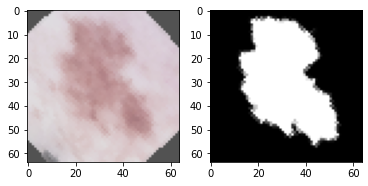

In [7]:
# DEBUG poligon
if not IS_MAIN:
    import matplotlib.pyplot as plt
    from torchvision.transforms import ToPILImage
    
    sample = train_dataset[21]
    untransform = ToPILImage()

    img = untransform(sample['image'])
    msk = untransform(sample['mask'])

    fig, ax = plt.subplots(1,2)
    ax[0].imshow(img)
    ax[1].imshow(msk, 'gray')
    plt.show()

In [8]:
# get indexes for transform generators
def get_indexes(dataset, preferred_size):
    # make list of indexes
    indexes = []
    img_count = 0
    i = 0

    while img_count < preferred_size:
        indexes += [[i, img_count]]
        img_count += 1
        i += 1
        if i >= len(dataset):
            i = 0 
    return indexes

In [9]:
# Paralell image transformer. TRAIN
from concurrent.futures import ThreadPoolExecutor

# paralell function
def transform_train(index):
    sample = train_dataset[index[0]]
    
    img = untransform(sample['image'])
    msk = untransform(sample['mask'])
    
    img.save(t_dir['seg']['train']['img']+'/'+str(index[1])+'.png')
    msk.save(t_dir['seg']['train']['msk']+'/'+str(index[1])+'.png')    

indexes = get_indexes(train_dataset, t_config['seg']['train_size'])

with ThreadPoolExecutor() as e: 
    e.map(transform_train, indexes)
print('train image transform done.')

train image transform done.


In [10]:
# Paralell image transformer. TEST
def transform_test(index):
    sample = test_dataset[index[0]]
    
    img = untransform(sample['image'])
    msk = untransform(sample['mask'])
    
    img.save(t_dir['seg']['test']['img']+'/'+str(index[1])+'.png')
    msk.save(t_dir['seg']['test']['msk']+'/'+str(index[1])+'.png')  
    
indexes = get_indexes(test_dataset, t_config['seg']['test_size'])

with ThreadPoolExecutor() as e: 
    e.map(transform_test, indexes)
print('test image transform done.')

test image transform done.


In [11]:
# Paralell image transformer. VALIDATION

def transform_validation(index):
    sample = validation_dataset[index[0]]
    
    img = untransform(sample['image'])
    msk = untransform(sample['mask'])
    
    img.save(t_dir['seg']['val']['img']+'/'+str(index[1])+'.png')
    msk.save(t_dir['seg']['val']['msk']+'/'+str(index[1])+'.png')  
    
indexes = get_indexes(validation_dataset, t_config['seg']['val_size'])

with ThreadPoolExecutor() as e: 
    e.map(transform_validation, indexes)
print('validation image transform done.')

validation image transform done.


In [12]:
print('Train images generated     : {}/{}'.format(len(os.listdir(t_dir['seg']['train']['img'])),t_config['seg']['train_size'])) 
print('Train masks generated      : {}/{}'.format(len(os.listdir(t_dir['seg']['train']['msk'])),t_config['seg']['train_size']))
print('Test images generated      : {}/{}'.format(len(os.listdir(t_dir['seg']['test']['img'])),t_config['seg']['test_size']))
print('Test masks generated       : {}/{}'.format(len(os.listdir(t_dir['seg']['test']['msk'])),t_config['seg']['test_size']))
print('Validation images generated: {}/{}'.format(len(os.listdir(t_dir['seg']['val']['img'])),t_config['seg']['val_size']))
print('Validation masks generated : {}/{}'.format(len(os.listdir(t_dir['seg']['val']['msk'])),t_config['seg']['val_size']))

Train images generated     : 500/500
Train masks generated      : 500/500
Test images generated      : 100/100
Test masks generated       : 100/100
Validation images generated: 200/200
Validation masks generated : 200/200


# Classification data transform

In [13]:
print('Classification preprocessing...')

validation_dataset = ISICDataset_clf(clf_validation_dir, validation_transforms, shuffle=False)
train_dataset = ISICDataset_clf(clf_train_dir, train_transforms, shuffle=False)
test_dataset = ISICDataset_clf(clf_test_dir, test_transforms, shuffle=False)

Classification preprocessing...


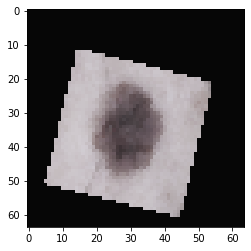

In [14]:
# DEBUG poligon
if not IS_MAIN:
    import matplotlib.pyplot as plt
    from torchvision.transforms import ToPILImage
    
    sample = train_dataset[21]
    untransform = ToPILImage()

    img = untransform(sample['image'])

    plt.imshow(img)
    plt.show()

In [15]:
def get_filecount(dataset): 
    melanoma_files = (dataset.labels == 1).sum().item()
    nevus_files = len(dataset) - melanoma_files
    return melanoma_files, nevus_files
    

In [16]:
# get indexes for transform generators
def get_indexes_clf(dataset, real_size, preferred_size, start_idx=0):
    # make list of indexes
    indexes = []
    img_count = 0
    i = start_idx

    while img_count < preferred_size:
        indexes += [[i, img_count]]
        img_count += 1
        i += 1
        
        if i > real_size:
            i = 0 
    return indexes

In [17]:
# Paralell image transformer. TRAIN

def transform_train_mel(index):
    sample = train_dataset[index[0]]
    img = untransform(sample['image'])
    
    img.save(t_dir['clf']['train']['mel']+'/'+str(index[1])+'.png')

def transform_train_nev(index):
    sample = train_dataset[index[0]]
    img = untransform(sample['image'])
    
    img.save(t_dir['clf']['train']['nev']+'/'+str(index[1])+'.png')

    
mel_count, nev_count = get_filecount(train_dataset)
mel_indexes = get_indexes_clf(train_dataset, mel_count,
                              t_config['clf']['train_size']['mel'])
nev_indexes = get_indexes_clf(train_dataset, nev_count,
                              t_config['clf']['train_size']['nev'], start_idx=mel_count)

with ThreadPoolExecutor() as e: 
    e.map(transform_train_mel, mel_indexes)
    
with ThreadPoolExecutor() as e: 
    e.map(transform_train_nev, nev_indexes)
    
print('train image transform done.')

train image transform done.


In [18]:
# Paralell image transformer. VALIDATION

def transform_val_mel(index):
    sample = validation_dataset[index[0]]
    img = untransform(sample['image'])
    
    img.save(t_dir['clf']['val']['mel']+'/'+str(index[1])+'.png')

def transform_val_nev(index):
    sample = validation_dataset[index[0]]
    img = untransform(sample['image'])
    
    img.save(t_dir['clf']['val']['nev']+'/'+str(index[1])+'.png')

    
mel_count, nev_count = get_filecount(validation_dataset)
mel_indexes = get_indexes_clf(validation_dataset, mel_count,
                              t_config['clf']['val_size']['mel'])
nev_indexes = get_indexes_clf(validation_dataset, nev_count,
                              t_config['clf']['val_size']['nev'], start_idx=mel_count)

with ThreadPoolExecutor() as e: 
    e.map(transform_val_mel, mel_indexes)
    
with ThreadPoolExecutor() as e: 
    e.map(transform_val_nev, nev_indexes)
    
print('validation image transform done.')

validation image transform done.


In [19]:
# Paralell image transformer. TEST

def transform_test_mel(index):
    sample = test_dataset[index[0]]
    img = untransform(sample['image'])
    
    img.save(t_dir['clf']['test']['mel']+'/'+str(index[1])+'.png')

def transform_test_nev(index):
    sample = test_dataset[index[0]]
    img = untransform(sample['image'])
    
    img.save(t_dir['clf']['test']['nev']+'/'+str(index[1])+'.png')

    
mel_count, nev_count = get_filecount(test_dataset)
mel_indexes = get_indexes_clf(test_dataset, mel_count,
                              t_config['clf']['test_size']['mel'])
nev_indexes = get_indexes_clf(test_dataset, nev_count,
                              t_config['clf']['test_size']['nev'], start_idx=mel_count)

with ThreadPoolExecutor() as e: 
    e.map(transform_test_mel, mel_indexes)
    
with ThreadPoolExecutor() as e: 
    e.map(transform_test_nev, nev_indexes)
    
print('test image transform done.')

test image transform done.


In [20]:
print('Train images generated     : {}/{}'.format(len(os.listdir(t_dir['clf']['train']['nev'])),t_config['clf']['train_size']['nev'])) 
print('Train masks generated      : {}/{}'.format(len(os.listdir(t_dir['clf']['train']['mel'])),t_config['clf']['train_size']['mel']))
print('Test images generated      : {}/{}'.format(len(os.listdir(t_dir['clf']['test']['nev'])),t_config['clf']['test_size']['nev']))
print('Test masks generated       : {}/{}'.format(len(os.listdir(t_dir['clf']['test']['mel'])),t_config['clf']['test_size']['mel']))
print('Validation images generated: {}/{}'.format(len(os.listdir(t_dir['clf']['val']['nev'])),t_config['clf']['val_size']['nev']))
print('Validation masks generated : {}/{}'.format(len(os.listdir(t_dir['clf']['val']['mel'])),t_config['clf']['val_size']['mel']))

Train images generated     : 250/250
Train masks generated      : 250/250
Test images generated      : 50/50
Test masks generated       : 50/50
Validation images generated: 100/100
Validation masks generated : 100/100
